In [2]:
import pandas as pd
import numpy as np
from scipy import interpolate

"ASTROPY"
from astropy.time import Time
from astropy.table import Table
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
import astropy.units as u
import astropy.constants as c

In [3]:
"MATPLOTLIB"
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm

mpl.rcParams['font.family'] = 'Latin Modern Roman'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2

In [4]:
"PARA IMPORTAR DE IPYNB"
import import_ipynb
import utils

importing Jupyter notebook from utils.ipynb


In [5]:
ephemeris = pd.read_csv("../ephemeris2.csv")
ephemeris['hours'] = 24*(ephemeris['datetime_jd']-ephemeris['datetime_jd'][0])
MIN = ephemeris['delta (Rt)'].argmin()

In [6]:
def xaxis():
    """
    Generic function to create the appropriate x axis with the times and such
    """
    xticks = range(6,len(ephemeris),24)
    plt.xlim([ephemeris['hours'].iloc[6],ephemeris['hours'].iloc[-1]])
    plt.xticks([ephemeris['hours'][i] for i in xticks],
                [ephemeris['datetime_str'][i][-5:] for i in xticks], size=16)

In [7]:
c.R_earth

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal Earth equatorial radius' value=6378100.0 uncertainty=0.0 unit='m' reference='IAU 2015 Resolution B 3'>

## Distance Plot

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


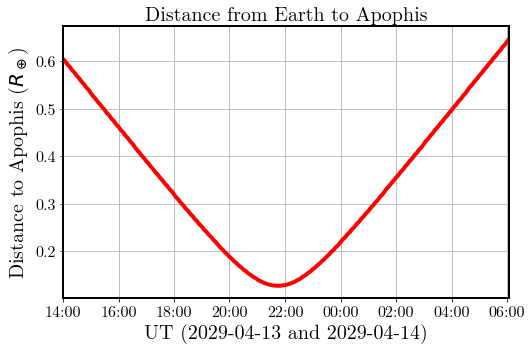

In [8]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_title(f"Distance from Earth to Apophis",size=20)
ax.plot(ephemeris['hours'],ephemeris['delta (Rt)'] * c.R_earth / c.c,'r-',lw=4)
ax.set_xlabel("UT (2029-04-13 and 2029-04-14)")
ax.set_ylabel("Distance to Apophis ($R_\oplus$)")
ax.grid()
xaxis()
plt.yticks(size=16)
# plt.ylim([0,30])

name = "../Figures/fig1_distance_plot"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')

## Magnitude Plot

C:\Users\agustin.vallejo\AppData\Local\Continuum\anaconda3\envs\apophis\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


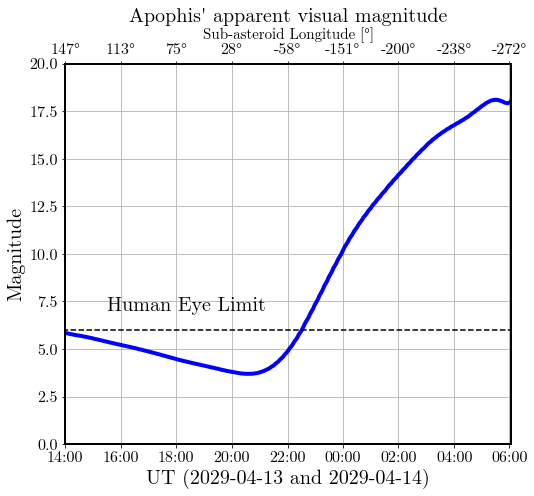

In [9]:
fig,ax = plt.subplots(figsize=(8,7))
ax.set_title(f"Apophis' apparent visual magnitude",size=20)

poly = np.polyfit(range(200),ephemeris['V'], deg=20)
p = np.poly1d(poly)
V = p(range(200))

ax.plot(ephemeris['hours'],V,'b-',lw=4)
ax.set_xlabel("UT (2029-04-13 and 2029-04-14)")
ax.set_ylabel("Magnitude")
ax.text(ephemeris['hours'][0]+2,7,"Human Eye Limit",size=20)
ax.grid()
xaxis()

secax = ax.secondary_xaxis('top')
secax.set_xlabel('Sub-asteroid Longitude [°]',size=15)

xticks = range(6,len(ephemeris),24)
secax.set_xticks([ephemeris['hours'][i] for i in xticks])
secax.set_xticklabels([f"{round(ephemeris['Longitude'][i])}°" for i in xticks], size=16)


plt.yticks(size=16)
plt.ylim([0,20])

plt.plot([-10,100],[6,6],'k--')

name = "../Figures/fig3_magV"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')

## Loading Observatory Data

In [10]:
radio =  pd.read_csv("../AllRadiotelescopes.csv").dropna(axis=0,how='all')
# radio

In [11]:
angles = []
for r,row in ephemeris.iterrows():
    angle = utils.size_angle(radio.iloc[0],row)
    angles.append( angle.to(u.arcsec).value )

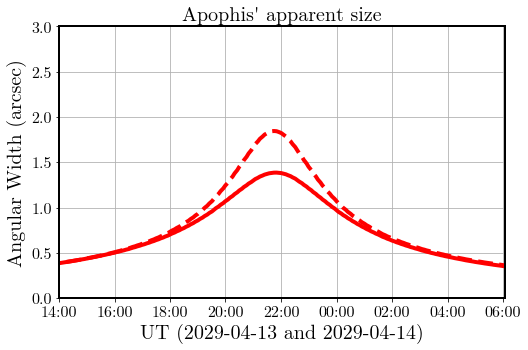

In [12]:
fig,ax = plt.subplots(figsize=(8,5))
ax.set_title(f"Apophis' apparent size",size=20)
ax.plot(ephemeris['hours'],angles,'r-',lw=4)
ax.plot(ephemeris['hours'],ephemeris['ang_width'],'r--',lw=4)

ax.set_xlabel("UT (2029-04-13 and 2029-04-14)")
ax.set_ylabel("Angular Width (arcsec)")
ax.grid()
xaxis()
plt.yticks(size=16)
plt.ylim([0,3])

name = "../Figures/fig3_magV"
# plt.savefig(name+".pdf",bbox_inches='tight')
# plt.savefig(name+".png",bbox_inches='tight')

## Observatory Pairs

In [13]:
radio.Name

0              Canberra DSS-43
1                       Parkes
2                Madrid DSS-63
3                       Lovell
4                   Effelsberg
5                    AVN-Ghana
6                    Goldstone
7                   Green Bank
8             Very Large Array
9                    Arecibo 2
10                        FAST
11               Galenki RT-70
12    Usuda Deep Space Center 
Name: Name, dtype: object

In [14]:
pairs = [
    ('CDS','PRK'),
    ('ECD','FAS'),
    ('USU','FAS'),
    ('MDS','LOV'),
    ('MDS','EFE'),
    ('MDS','AVN'),
    ('GOL','GBT'),
    ('GOL','VLA'),
    ('ARE','GBT'),
]

radio_pairs = [
    (radio[radio.Code == a].iloc[0],
    radio[radio.Code == b].iloc[0])
     for a,b in pairs
     ]

[(x.Name,y.Name) for x,y in radio_pairs]

[('Canberra DSS-43', 'Parkes'),
 ('Galenki RT-70', 'FAST'),
 ('Usuda Deep Space Center ', 'FAST'),
 ('Madrid DSS-63', 'Lovell'),
 ('Madrid DSS-63', 'Effelsberg'),
 ('Madrid DSS-63', 'AVN-Ghana'),
 ('Goldstone', 'Green Bank'),
 ('Goldstone', 'Very Large Array'),
 ('Arecibo 2', 'Green Bank')]

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


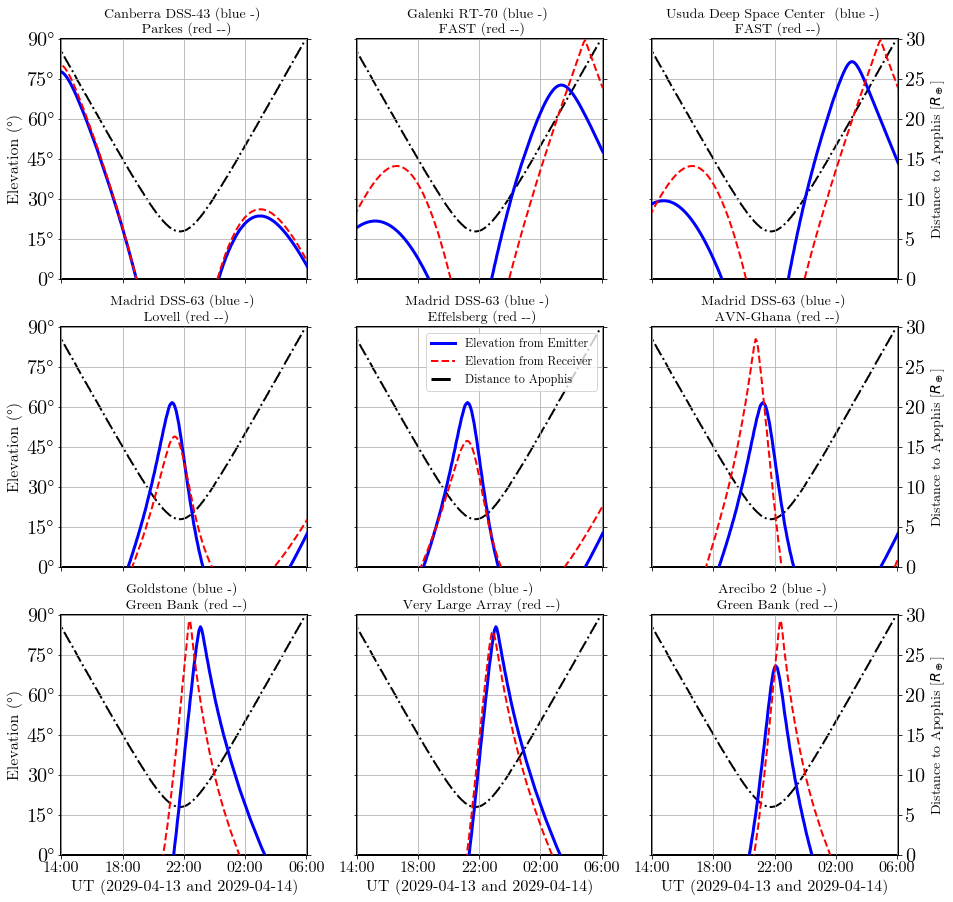

In [15]:
def axes(ax,i):
    ax.grid()
    ax.set_ylim([0,90])
    ax.set_xlim([0,ephemeris['hours'].iloc[-1]])
    xticks = range(6,len(ephemeris),48)
    ax.set_xlim([ephemeris['hours'].iloc[6],ephemeris['hours'].iloc[-1]])
    ax.set_xticks([ephemeris['hours'][i] for i in xticks])
    yticks = list(range(0,91,15))
    ax.set_yticks(yticks)

    if i > 5:
        ax.set_xticklabels([ephemeris['datetime_str'][i][-5:] for i in xticks],size=16)
        ax.set_xlabel("UT (2029-04-13 and 2029-04-14)",size=16)
    else:
        ax.set_xticklabels([])

    if i%3 == 0:
        ax.set_yticklabels(["%i°"%h for h in yticks])
        ax.set_ylabel("Elevation (°)",size=16)
    else:
        ax.set_yticklabels([])

    if i == 4:
        ax.legend(fontsize=12)

fig, axs = plt.subplots(3,3, figsize=(15,15))
for i,pairobs in enumerate(radio_pairs):
    obs1, obs2 = pairobs
    pair = utils.observatory_pair(obs1,obs2,ephemeris)

    ax = axs.flat[i]
    ax2=ax.twinx()

    ax2.plot(ephemeris['hours'],ephemeris['delta (Rt)'],'k-.',lw=2)
    ax2.set_yticks([])

    ax.set_title(f"{obs1['Name']} (blue -) \n {obs2['Name']} (red --)",size=14)
    ax.plot(ephemeris['hours'],pair['elevation1'],label=f"Elevation from Emitter",lw=3,color='b')
    ax.plot(ephemeris['hours'],pair['elevation2'],'--',label=f"Elevation from Receiver",lw=2,color='r')
    ax.plot([-100],[-100],'k-.',label='Distance to Apophis',lw=3)
    # ax.set_ylabel("Apophis' Elevation (°)",size=14)
    axes(ax,i)

    yticks = list(range(0,31,5))
    ax2.set_yticks(yticks)
    ax2.set_yticklabels([])
    ax2.set_ylim([0,30])

    if (i+1)%3==0:
        ax2.set_ylabel("Distance to Apophis [$R_\oplus$]",size=14)
        ax2.set_yticklabels(yticks)

    ax.set_zorder(ax2.get_zorder()+1)
    ax.set_frame_on(False)

name = "../Figures/fig4_pairs"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')

In [16]:
emitting = ['CDS','MDS','ARE','GOL','ECD','USU']
receiving = ['PRK','LOV','EFE','AVN','GBT','VLA','FAS']

emitting = [radio[radio.Code == a].iloc[0] for a in emitting]
receiving = [radio[radio.Code == a].iloc[0] for a in receiving]

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


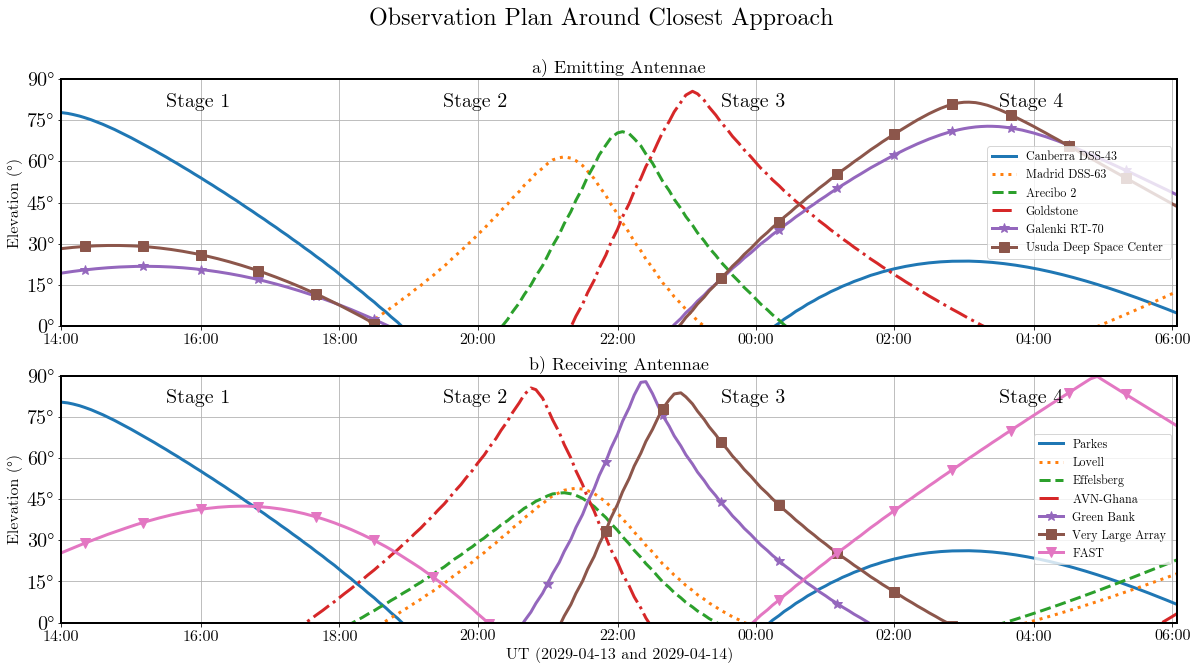

In [17]:
def axes(ax,i):
    ax.set_ylim([0,90])
    ax.set_xlim([0,ephemeris['hours'].iloc[-1]])
    xticks = range(6,len(ephemeris),24)
    ax.set_xlim([ephemeris['hours'].iloc[6],ephemeris['hours'].iloc[-1]])
    ax.set_xticks([ephemeris['hours'][i] for i in xticks])
    yticks = list(range(0,91,15))
    ax.set_yticks(yticks)
    ax.set_yticklabels(["%i°"%h for h in yticks])
    ax.set_ylabel("Elevation (°)",size=16)
    ax.set_xticklabels([ephemeris['datetime_str'][i][-5:] for i in xticks],size=16)

    if i == 1:
        ax.set_xlabel("UT (2029-04-13 and 2029-04-14)",size=16)


fig, axs = plt.subplots(2,1, figsize=(20,10))
styles = ['-',':','--','-.','*-','s-','v-','o-','D-']

for i,antennae in enumerate([emitting,receiving]):
    ax = axs.flat[i]

    for j,obs1 in enumerate(antennae):
        obs_data = utils.single_elevation(obs1,ephemeris)
        ax.plot(ephemeris['hours'],obs_data['elevation1'],
            styles[j],label=f"{obs1['Name']}",lw=3,
            markevery=10, ms=10)
        axes(ax,i)

    for tt,t in enumerate(range(30,len(ephemeris),48)):
        ax.text(ephemeris['hours'][t]-0.5, 80, f"Stage {tt+1}")

    ax.legend(fontsize=12, loc="center right")
    ax.grid()

axs[0].set_title("a) Emitting Antennae",size=18)
axs[1].set_title("b) Receiving Antennae",size=18)

fig.suptitle("Observation Plan Around Closest Approach")

name = "../Figures/fig9_obsPlan"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')

In [18]:
obs1

ID                                                                 4
Name                                                            FAST
Location                                              Guizhou, China
Frequency Range                                          70�3000�MHz
Remarks            500m radio telescope, the world's largest fill...
Longitude                                                  106.85678
Latitude                                                    25.65289
Power                                                            NaN
Diameter                                                        500m
Link                                                             NaN
Code                                                             FAS
Stage                                                            4.1
Frequency                                                        NaN
Lambda                                                           NaN
Tsys                              

In [19]:
teide = {
    "Name":"Teide",
    "Longitude":16.5,
    "Latitude":28.25
}

In [20]:

ephemeris['datetime_str'][124::]

124    2029-Apr-13 23:50
125    2029-Apr-13 23:55
126    2029-Apr-14 00:00
127    2029-Apr-14 00:05
128    2029-Apr-14 00:10
             ...        
195    2029-Apr-14 05:45
196    2029-Apr-14 05:50
197    2029-Apr-14 05:55
198    2029-Apr-14 06:00
199    2029-Apr-14 06:05
Name: datetime_str, Length: 76, dtype: object

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


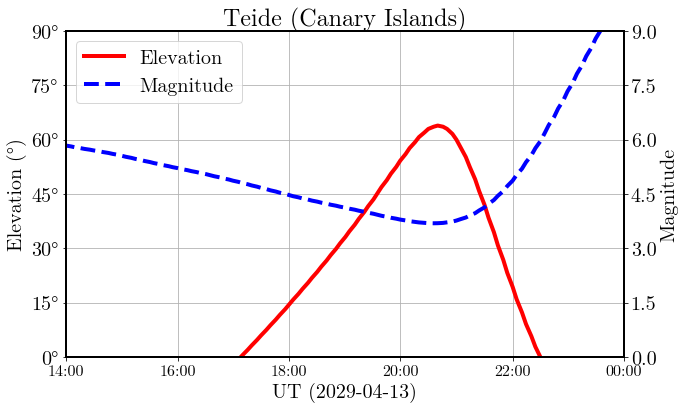

In [21]:
def axes(ax,i):
    ax.set_ylim([0,90])
    xticks = range(6,127,24)
    ax.set_xlim([ephemeris['hours'].iloc[6],ephemeris['hours'].iloc[126]])
    ax.set_xticks([ephemeris['hours'][i] for i in xticks])
    yticks = list(range(0,91,15))
    ax.set_yticks(yticks)
    ax.set_yticklabels(["%i°"%h for h in yticks])
    ax.set_ylabel("Elevation (°)")
    ax.set_xticklabels([ephemeris['datetime_str'][i][-5:] for i in xticks],size=16)

    ax.set_xlabel("UT (2029-04-13)")


plt.figure(figsize=(10,6))
ax = plt.gca()

obs_data = utils.single_elevation(teide,ephemeris)
line1= ax.plot(ephemeris['hours'],obs_data['elevation1'],'r-',label="Elevation",lw=4,markevery=10, ms=10)[0]
axes(ax,i)

ax2=ax.twinx()
line2 = ax2.plot(ephemeris['hours'],V,'b--',lw=4,label="Magnitude")[0]
ax2.set_ylabel("Magnitude")
# ax2.text(ephemeris['hours'][0]+1,7,"Human Eye Limit",size=20)
# plt.plot([-10,100],[6.5,6.5],'k--')
ax2.set_ylim([0,9])
ax2.set_yticks(np.arange(0,9.1,1.5))

ax.grid()
plt.legend(handles=[line1,line2])

plt.title("Teide (Canary Islands)")

name = "../Figures/fig12_Teide"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')

## Trajectories

In [22]:
def add_arrow(line, position=None, direction='right', size=15, color=None):
    """
    add an arrow to a line.

    line:       Line2D object
    position:   x-position of the arrow. If None, mean of xdata is taken
    direction:  'left' or 'right'
    size:       size of the arrow in fontsize points
    color:      if None, line color is taken.
    """
    if color is None:
        color = line.get_color()

    xdata = line.get_xdata()
    ydata = line.get_ydata()

    if position is None:
        position = xdata.mean()
    # find closest index
    start_ind = np.argmin(np.absolute(xdata - position))
    if direction == 'right':
        end_ind = start_ind + 1
    else:
        end_ind = start_ind - 1

    line.axes.annotate('',
        xytext=(xdata[start_ind], ydata[start_ind]),
        xy=(xdata[end_ind], ydata[end_ind]),
        arrowprops=dict(arrowstyle="-|>", color=color),
        size=size
    )

In [23]:
def rotation(ax,N,R,dth):
    line = ax.plot(np.linspace(0,dth,N,endpoint=True),np.ones(N)*R,'b-',lw=2)
    return line

In [24]:
def get_lon(TIME,RA):
  """
  Gets the longitude that will be under the asteroid at every moment
  """
  T = Time(TIME,format='jd')
  G = T.sidereal_time('apparent', 'greenwich').to(u.deg)
  return RA - G.value

sun = get_lon(ephemeris['datetime_jd'][::10],1.5*15)
for i in range(len(sun)):
   if sun[i] < -180: sun[i] += 360

sun = np.deg2rad(sun)

C:\Users\agustin.vallejo\AppData\Local\Continuum\anaconda3\envs\apophis\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utcut1" yielded 20 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\agustin.vallejo\AppData\Local\Continuum\anaconda3\envs\apophis\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utctai" yielded 20 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


<ipython-input-25-40bab78f8b57>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{s}h" for s in range(0,25,3)])
<ipython-input-25-40bab78f8b57>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([f"{angle(s)}°" for s in range(0,360,45)])


-0.387555673804854
-2.5737901911294263
1.7436741524047992


'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


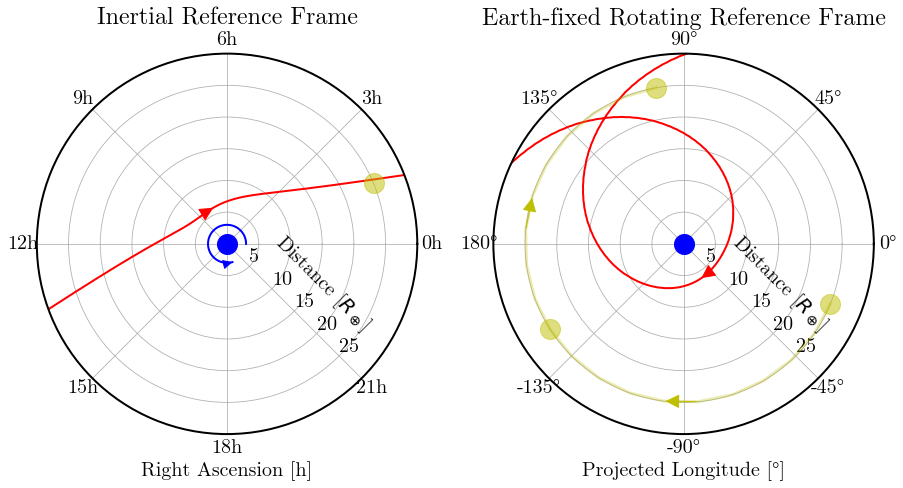

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2,subplot_kw={'projection': 'polar'},figsize=(15,8))

def polar(ax,key,ylabel,title):
    line = ax.plot(np.deg2rad(ephemeris[key]),ephemeris['delta (Rt)'],'r-',lw=2)[0]
    ax.set_xlabel(ylabel)
    ax.set_yticks([5,10,15,20,25])
    ax.text(-1.4*np.pi/4,15,"Distance [$R_\oplus$]",rotation=-45)
    ax.set_ylim([0,30])
    ax.set_rlabel_position(315)
    if key == 'RA':
        ax.set_xticklabels([f"{s}h" for s in range(0,25,3)])
        arrow = rotation(ax,100,3,5)[0]
        add_arrow(arrow,size=20,position=4.95)
        ax.plot(np.deg2rad(1.5*15),25,'yo',ms=20, alpha=0.5)
    else:
        angle = lambda x: x if x<= 180 else x - 360
        ax.set_xticklabels([f"{angle(s)}°" for s in range(0,360,45)])
        N = len(sun)
        for n in [0,N//2,N-1]:
            print(sun[n])
            ax.plot(sun[n],25,'yo',ms=20, alpha=0.5)
        sun_path = ax.plot(sun,sun*0+25,'y-', alpha=0.3, lw=3)[0]
        add_arrow(sun_path,size=30, position=np.pi)
        # add_arrow(sun_path,size=30, position=-3*np.pi/4)
        add_arrow(sun_path,size=30, position=-np.pi/2)


    ax.set_title(title)
    ax.plot(0,0,'bo',ms=20)
    add_arrow(line,size=30)
    # xticks = np.arange(0,2*np.pi,np.pi/4)
    # xtickslabels = ["%i°E"%np.rad2deg(t) if t<=np.pi else "%i°W"%np.rad2deg(abs(t-2*np.pi)) for t in xticks]
    # ax.set_xticks(xticks)
    # ax.set_xticklabels(xtickslabels)

polar(ax1,'RA','Right Ascension [h]','Inertial Reference Frame')
polar(ax2,'Longitude',"Projected Longitude [°]",'Earth-fixed Rotating Reference Frame')

name = "../Figures/fig7_polar"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')

## Subradar Points

In [26]:
subradar_points = pd.read_csv("../Data/subradar_points.csv")

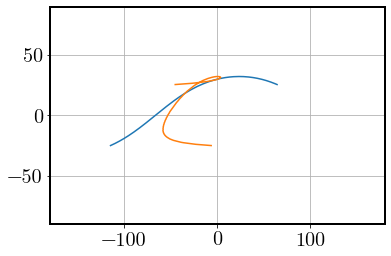

In [27]:
plt.plot(subradar_points.lon,subradar_points.lat)
plt.plot(subradar_points.lonR,subradar_points.latR)

plt.xlim([-180,180])
plt.ylim([-90,90])

plt.grid()

In [28]:
def rot(dl):
    time=pd.to_datetime(dl.date)
    dt=(time.iloc[1]-time.iloc[0]).total_seconds()*u.s # time increment in dl
    lon=(dl.lonR.to_numpy())*u.deg.to(u.rad) # sub-radar longitude to radians
    lat=(dl.latR.to_numpy())*u.deg.to(u.rad) # sub-radar latitude to radians
    x=np.sin(lat)*np.cos(lon) # unit vector coord x
    y=np.sin(lat)*np.sin(lon) # unit vector coord y
    z=np.cos(lat) # unit vector coord z
    pointing=np.vstack((x,y,z)).T # unit vector of subradar pointing
    dtheta=np.arccos((pointing[1:]*pointing[:-1]).sum(axis=1)) # change in angle from moment to moment
    omega=dtheta/dt # angular frequency
    period=2*np.pi/omega # return rotation period
    rotfreq=1/period # rotation frequency
    phi=lat[1:] # subradar latitude
    return omega.to(1/u.h)*u.rad.to(u.deg)

def rot0(dl):
    time=pd.to_datetime(dl.date)
    dt=(time.iloc[1]-time.iloc[0]).total_seconds()*u.s # time increment in dl
    lon=(dl.lon.to_numpy())*u.deg.to(u.rad) # sub-radar longitude to radians
    lat=(dl.lat.to_numpy())*u.deg.to(u.rad) # sub-radar latitude to radians
    x=np.sin(lat)*np.cos(lon) # unit vector coord x
    y=np.sin(lat)*np.sin(lon) # unit vector coord y
    z=np.cos(lat) # unit vector coord z
    pointing=np.vstack((x,y,z)).T # unit vector of subradar pointing
    dtheta=np.arccos((pointing[1:]*pointing[:-1]).sum(axis=1)) # change in angle from moment to moment
    omega=dtheta/dt # angular frequency
    period=2*np.pi/omega # return rotation period
    rotfreq=1/period # rotation frequency
    phi=lat[1:] # subradar latitude
    return omega.to(1/u.h)*u.rad.to(u.deg)

C:\Users\agustin.vallejo\AppData\Local\Continuum\anaconda3\envs\apophis\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


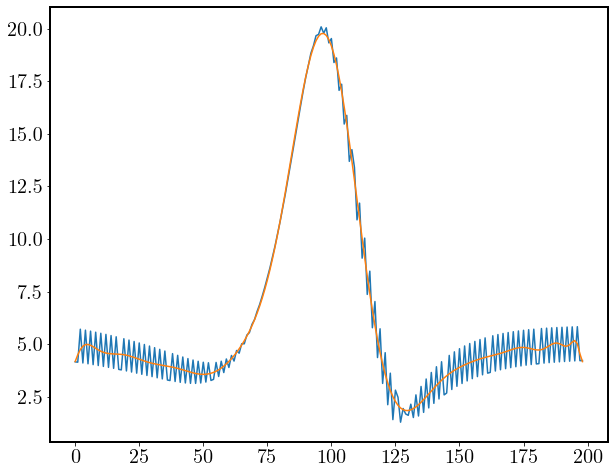

In [29]:
period2 = rot(subradar_points)
poly = np.polyfit(range(199),period2.value, deg=50)
p = np.poly1d(poly)
period3 = p(range(199))
plt.figure(figsize=(10,8))
plt.plot(period2)
plt.plot(period3)

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


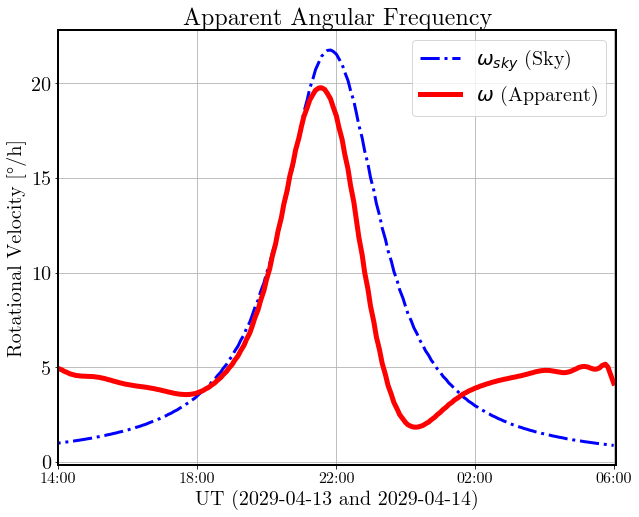

In [30]:
def x_axis_base(ax):
    ax.set_xlim([0,ephemeris['hours'].iloc[-1]])
    xticks = range(6,len(ephemeris),48)
    ax.set_xlim([ephemeris['hours'].iloc[6],ephemeris['hours'].iloc[-1]])
    ax.set_xticks([ephemeris['hours'][i] for i in xticks])
    ax.set_xticklabels([ephemeris['datetime_str'][i][-5:] for i in xticks],size=16)
    ax.set_xlabel("UT (2029-04-13 and 2029-04-14)",size=20)


plt.figure(figsize=(10,8))
# plt.plot(rot(subradar_points))
period = rot0(subradar_points)
plt.plot(ephemeris['hours'][:-1],period,'b-.',label="$\omega_{sky}$ (Sky)",lw=3)
# plt.plot(ephemeris['hours'][:-1],period3-period.value,'--',label="$\omega_r$ (Rotation)",lw=2)
plt.plot(ephemeris['hours'][:-1],period3,'r-',label="$\omega$ (Apparent)",lw=5)
plt.legend()
plt.ylabel("Rotational Velocity [°/h]")
x_axis_base(plt.gca())
plt.grid()
plt.title("Apparent Angular Frequency")

name = "../Figures/fig8_rotations"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')